<a href="https://colab.research.google.com/github/WillHK/DS-Unit-2-Classification-1/blob/master/DS_Sprint_Challenge_7_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install category_encoders

_Lambda School Data Science, Unit 2_
 
# Classification 1 Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll use information about the shot and the game to predict whether the shot was made. This is hard to predict! Try for an accuracy score in the high 50's or low 60's. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date']).set_index('game_date')
assert df.shape == (13958, 19)

In [121]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0


In [132]:
df.isnull().sum()

game_id                    0
game_event_id              0
player_name                0
period                     0
minutes_remaining          0
seconds_remaining          0
action_type                0
shot_type                  0
shot_zone_basic            0
shot_zone_area             0
shot_zone_range            0
shot_distance              0
loc_x                      0
loc_y                      0
shot_made_flag             0
htm                        0
vtm                        0
season_type                0
scoremargin_before_shot    0
dtype: int64

This Sprint Challenge has two parts. To demonstrate mastery on each part, do all the required, numbered instructions. To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Prepare to model

### Required

1. **Do train/validate/test split.** Use the 2009-10 season through 2016-17 season to train, the 2017-18 season to validate, and the 2018-19 season to test. NBA seasons begin in October and end in June. You'll know you've split the data correctly when your train set has 11081 observations, your validation set has 1168 observations, and your test set has 1709 observations.
2. **Begin with baselines for classification.** Your target to predict is `shot_made_flag`. What is the baseline accuracy for the validation set, if you guessed the majority class for every prediction?
3. **Use Ordinal Encoding _or_ One-Hot Encoding,** for the categorical features you select.
4. **Train a Random Forest _or_ Logistic Regression** with the features you select.

### Stretch goals
Engineer at least 4 of these 5 features:

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?
    

In [0]:
def homecourt_advantage(df):
  df_c = df.copy()
  df_c['homecourt_advantage'] = df_c['htm'].apply(lambda htm: True if htm=='GSW' else False)
  return df_c

In [0]:
# Took me this long to realize I can apply over rows not just columns :doh:

def opposing_team(df):
  df_c = df.copy()
  df_c['opposing_team'] = df_c.apply(lambda row: row['vtm'] if row['htm'] == 'GSW' else row['htm'], axis=1)
  return df_c

In [0]:
def seconds_remaining_quarter(df):
  df_c = df.copy()
  df_c['seconds_remaining_quarter'] = df_c['minutes_remaining'] * 60 + df_c['seconds_remaining']
  return df_c

In [0]:
# This one is a bit tougher, I'll come back to it if I have time

# def seconds_remaining_game(df):
#   df_c = df.copy()
#   df_c['seconds_remaining_game'] = (4 - df_c['period']) * 

In [0]:
# There's gotta be a better way to iterate over a dataframe like this
# Takes forever to do it this way

def prev_shot_success(df):
  df_c = df.copy()
  
  for i in range(len(df_c)):
    df_c.iloc[i]['prev_shot_successful'] = df_c.iloc[i-1]['shot_made_flag'] == 1
  return df_c

In [0]:
train = df.iloc[df.index < '2017-07']
val = df.iloc[(df.index > '2017-10') & (df.index < '2018-07')]
test = df.iloc[df.index > '2018-10']

In [0]:
train = homecourt_advantage(train)
val = homecourt_advantage(val)
test = homecourt_advantage(test)

In [0]:
train = opposing_team(train)
val = opposing_team(val)
test = opposing_team(test)

In [0]:
train = seconds_remaining_quarter(train)
val = seconds_remaining_quarter(val)
test = seconds_remaining_quarter(test)

In [110]:
# Takes too long. Don't have all day for this to run.

# train = prev_shot_success(train)
# val = prev_shot_success(val)
# test = prev_shot_success(test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


KeyboardInterrupt: ignored

In [143]:
train.tail()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,homecourt_advantage,opposing_team,seconds_remaining_quarter
game_date,,,,,,,,,,,,,,,,,,,,,,
2017-06-12,41600405,500,Stephen Curry,4,4,32,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,0,8,1,GSW,CLE,Playoffs,10.0,True,CLE,272
2017-06-12,41600405,503,Stephen Curry,4,4,13,Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,1,-7,11,1,GSW,CLE,Playoffs,12.0,True,CLE,253
2017-06-12,41600405,527,Stephen Curry,4,1,37,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,28,1,283,0,GSW,CLE,Playoffs,11.0,True,CLE,97
2017-06-12,41600405,534,Stephen Curry,4,0,42,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-166,205,1,GSW,CLE,Playoffs,11.0,True,CLE,42
2017-06-12,41600405,536,Stephen Curry,4,0,20,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,23,235,7,0,GSW,CLE,Playoffs,12.0,True,CLE,20


In [144]:
from sklearn.metrics import accuracy_score
# 51.6% baseline accuracy
accuracy_score(val['shot_made_flag'], [0 for x in range(len(val))])

0.5162671232876712

In [0]:
X_train = train.drop(columns=['shot_made_flag'])
y_train = train['shot_made_flag']
X_val = val.drop(columns=['shot_made_flag'])
y_val = val['shot_made_flag']
X_test = test.drop(columns=['shot_made_flag'])
y_test = test['shot_made_flag']

In [146]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
  ce.OrdinalEncoder(),
  RandomForestClassifier(n_estimators=1000, max_depth=40, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['player_name', 'action_type', 'shot_type',
                                      'shot_zone_basic', 'shot_zone_area',
                                      'shot_zone_range', 'htm', 'vtm',
                                      'season_type', 'opposing_team'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'player_name',
                                          'data_type': dtype('O'),
                                          'mapping': Stephen Curry    1
NaN             -...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=40,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                  

## Part 2. Evaluate models

### Required
1. Get your model's **validation accuracy.** (Multiple times if you try multiple iterations.)
2. Get your model's **test accuracy.** (One time, at the end.)
3. Get and plot your Random Forest's **feature importances** _or_ your Logistic Regression's **coefficients.**
4. Imagine this is the confusion matrix for a binary classification model. **Calculate accuracy, precision, and recall for this confusion matrix:**

<table>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>Negative</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>Negative</td>
    <td style="border: solid">85</td>
    <td style="border: solid">58</td>
  </tr>
  <tr>
    <td>Positive</td>
    <td style="border: solid">8</td>
    <td style="border: solid"> 36</td>
  </tr>
</table>


### Stretch goals
- Calculate F1 score for the provided, imaginary confusion matrix.
- Plot a real confusion matrix for your basketball model, with row and column labels.
- Print the classification report for your model.

## Confusing matrix Accuracy, Precision and Recall

Accuracy: True Positive + True Negative / True Positive + True Negative + False Positive + False Negative

85+36/85+36+8+58= 121/187 = 0.647

Precision: True Positive / True Positive + False Positive

36 / 36 + 58 = 36/94 = 0.38

Recall: True Positive / True Positive + False Negative

36 / 36 + 8 = 36 / 44 = 0.818

In [100]:
# First try, better than the baseline at least
# Oops, overwrote the first score. It was better than this one though...
print(pipeline.score(X_val, y_val))

0.6001712328767124


In [147]:
# Second try after engineering some features: 0.5967...
# Basketball doesn't like me clearly.

print(pipeline.score(X_val, y_val))

0.5967465753424658


In [0]:
# Drop a few unimportant features
train = train.drop(columns=['player_name', 'shot_type'])
val = val.drop(columns=['player_name', 'shot_type'])
test = test.drop(columns=['player_name', 'shot_type'])

In [105]:
# And it's worse.
pipeline.fit(X_train, y_train)
print(pipeline.score(X_val, y_val))

0.5967465753424658


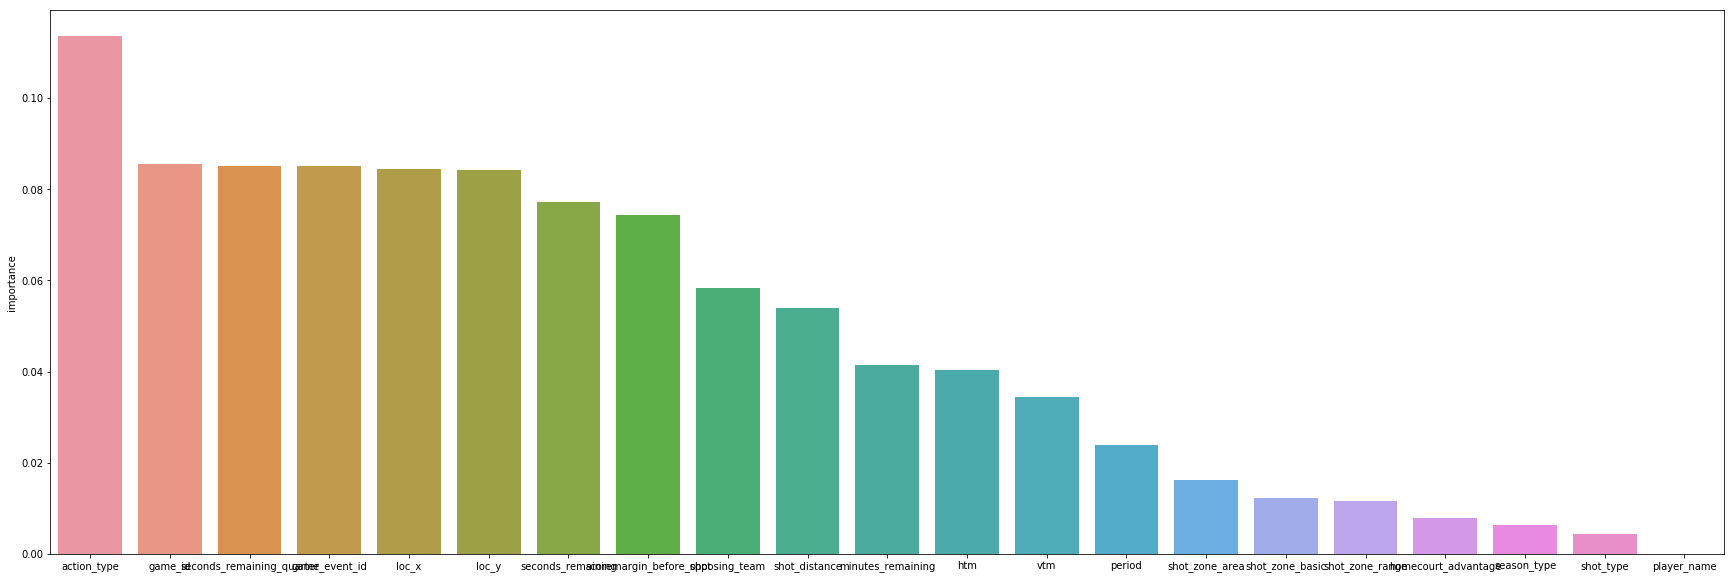

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
importances = pd.DataFrame(pipeline.steps[-1][1].feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

fig = plt.figure(figsize=(30,10))
sns.barplot(x=importances.index.values, y='importance', data=importances);

In [150]:
# Final Test Score
print(pipeline.score(X_test, y_test))

0.6155646576945583


In [151]:
from sklearn.metrics import f1_score

# F1 Score for demo confusion matrix
# 2 * precision * recall / precision + recall
2 * ((0.38 * 0.818)/ (0.38 + 0.818))

0.5189315525876461

In [0]:
from sklearn.metrics import confusion_matrix

cf = pd.DataFrame(confusion_matrix(y_val, pipeline.predict(X_val)))

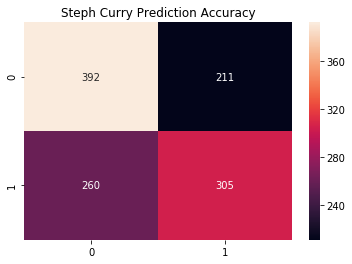

In [167]:
fig = plt.figure()

sns.heatmap(cf, annot=True, fmt='d')

plt.title('Steph Curry Prediction Accuracy')
plt.show()